In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline

In [56]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pIecRZdRzhPM5_cSqaHTEch7370Ae6TyfIFL1mGvgHd_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'carresalevalue-donotdelete-pr-vgedalggtcuodc'
object_key = 'cardata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.6,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.5,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.9,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.2,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.9,42450,Diesel,Dealer,Manual,0


In [57]:
df.shape

(2942, 9)

In [58]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 2 3]


In [59]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [60]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,2942.000000,2942.000000,2942.000000,2942.000000,2942.000000
mean,2015.304215,10.602413,17.631564,47584.797757,0.127124
std,3.952658,12.644775,22.365773,34434.195521,0.374491
min,2001.000000,0.100000,0.300000,500.000000,0.000000
25%,2013.000000,3.750000,6.400000,23907.000000,0.000000
50%,2015.000000,6.455000,9.600000,42000.000000,0.000000
75%,2018.000000,11.745000,18.900000,64449.500000,0.000000
max,2022.000000,162.220000,293.000000,500000.000000,3.000000


In [61]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [62]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.6,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.5,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.9,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.2,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.9,42450,Diesel,Dealer,Manual,0


In [63]:
final_dataset['Current Year']=2022

In [64]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.6,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.5,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.9,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.2,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.9,42450,Diesel,Dealer,Manual,0,2022


In [65]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [66]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.6,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.5,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.9,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.2,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.9,42450,Diesel,Dealer,Manual,0,2022,8


In [67]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [68]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,3.35,5.6,27000,Petrol,Dealer,Manual,0,2022,8
1,4.75,9.5,43000,Diesel,Dealer,Manual,0,2022,9
2,7.25,9.9,6900,Petrol,Dealer,Manual,0,2022,5
3,2.85,4.2,5200,Petrol,Dealer,Manual,0,2022,11
4,4.60,6.9,42450,Diesel,Dealer,Manual,0,2022,8


In [69]:
final_dataset=pd.get_dummies(final_dataset,drop_first=False)

In [70]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.6,27000,0,2022,8,0,0,1,1,0,0,1
1,4.75,9.5,43000,0,2022,9,0,1,0,1,0,0,1
2,7.25,9.9,6900,0,2022,5,0,0,1,1,0,0,1
3,2.85,4.2,5200,0,2022,11,0,0,1,1,0,0,1
4,4.60,6.9,42450,0,2022,8,0,1,0,1,0,0,1


In [71]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.6,27000,0,2022,8,0,0,1,1,0,0,1
1,4.75,9.5,43000,0,2022,9,0,1,0,1,0,0,1
2,7.25,9.9,6900,0,2022,5,0,0,1,1,0,0,1
3,2.85,4.2,5200,0,2022,11,0,0,1,1,0,0,1
4,4.60,6.9,42450,0,2022,8,0,1,0,1,0,0,1


In [72]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [73]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.6,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.5,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.9,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.2,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.9,42450,0,8,0,1,0,1,0,0,1


In [74]:
lst=[] 
lst = final_dataset[final_dataset['Selling_Price'] > 27]
lst.index

Int64Index([  64,   86,  320,  339,  368,  376,  393,  425,  430,  444,
            ...
            2864, 2878, 2882, 2886, 2889, 2890, 2896, 2905, 2916, 2929],
           dtype='int64', length=221)

In [75]:
final_dataset = final_dataset.drop(lst.index)


In [76]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.751820,-0.095737,-0.102157,-0.346510,-0.091672,0.402325,-0.378410,-0.037762,0.037762,0.504401,-0.504401
Present_Price,0.751820,1.000000,0.106680,0.032446,0.063223,-0.073453,0.330392,-0.311235,-0.019135,0.019135,0.561044,-0.561044
Kms_Driven,-0.095737,0.106680,1.000000,0.260467,0.490409,0.024372,0.302191,-0.308788,-0.039693,0.039693,-0.071983,0.071983
Owner,-0.102157,0.032446,0.260467,1.000000,0.315676,0.004484,0.015762,-0.016952,-0.045924,0.045924,0.014195,-0.014195
no_year,-0.346510,0.063223,0.490409,0.315676,1.000000,0.041770,0.001479,-0.012484,0.074809,-0.074809,-0.034117,0.034117
Fuel_Type_CNG,-0.091672,-0.073453,0.024372,0.004484,0.041770,1.000000,-0.133857,-0.129501,-0.009112,0.009112,-0.074087,0.074087
Fuel_Type_Diesel,0.402325,0.330392,0.302191,0.015762,0.001479,-0.133857,1.000000,-0.965321,-0.091254,0.091254,0.020572,-0.020572
Fuel_Type_Petrol,-0.378410,-0.311235,-0.308788,-0.016952,-0.012484,-0.129501,-0.965321,1.000000,0.093707,-0.093707,-0.001067,0.001067
Seller_Type_Dealer,-0.037762,-0.019135,-0.039693,-0.045924,0.074809,-0.009112,-0.091254,0.093707,1.000000,-1.000000,-0.038517,0.038517
Seller_Type_Individual,0.037762,0.019135,0.039693,0.045924,-0.074809,0.009112,0.091254,-0.093707,-1.000000,1.000000,0.038517,-0.038517


In [77]:
import seaborn as sns

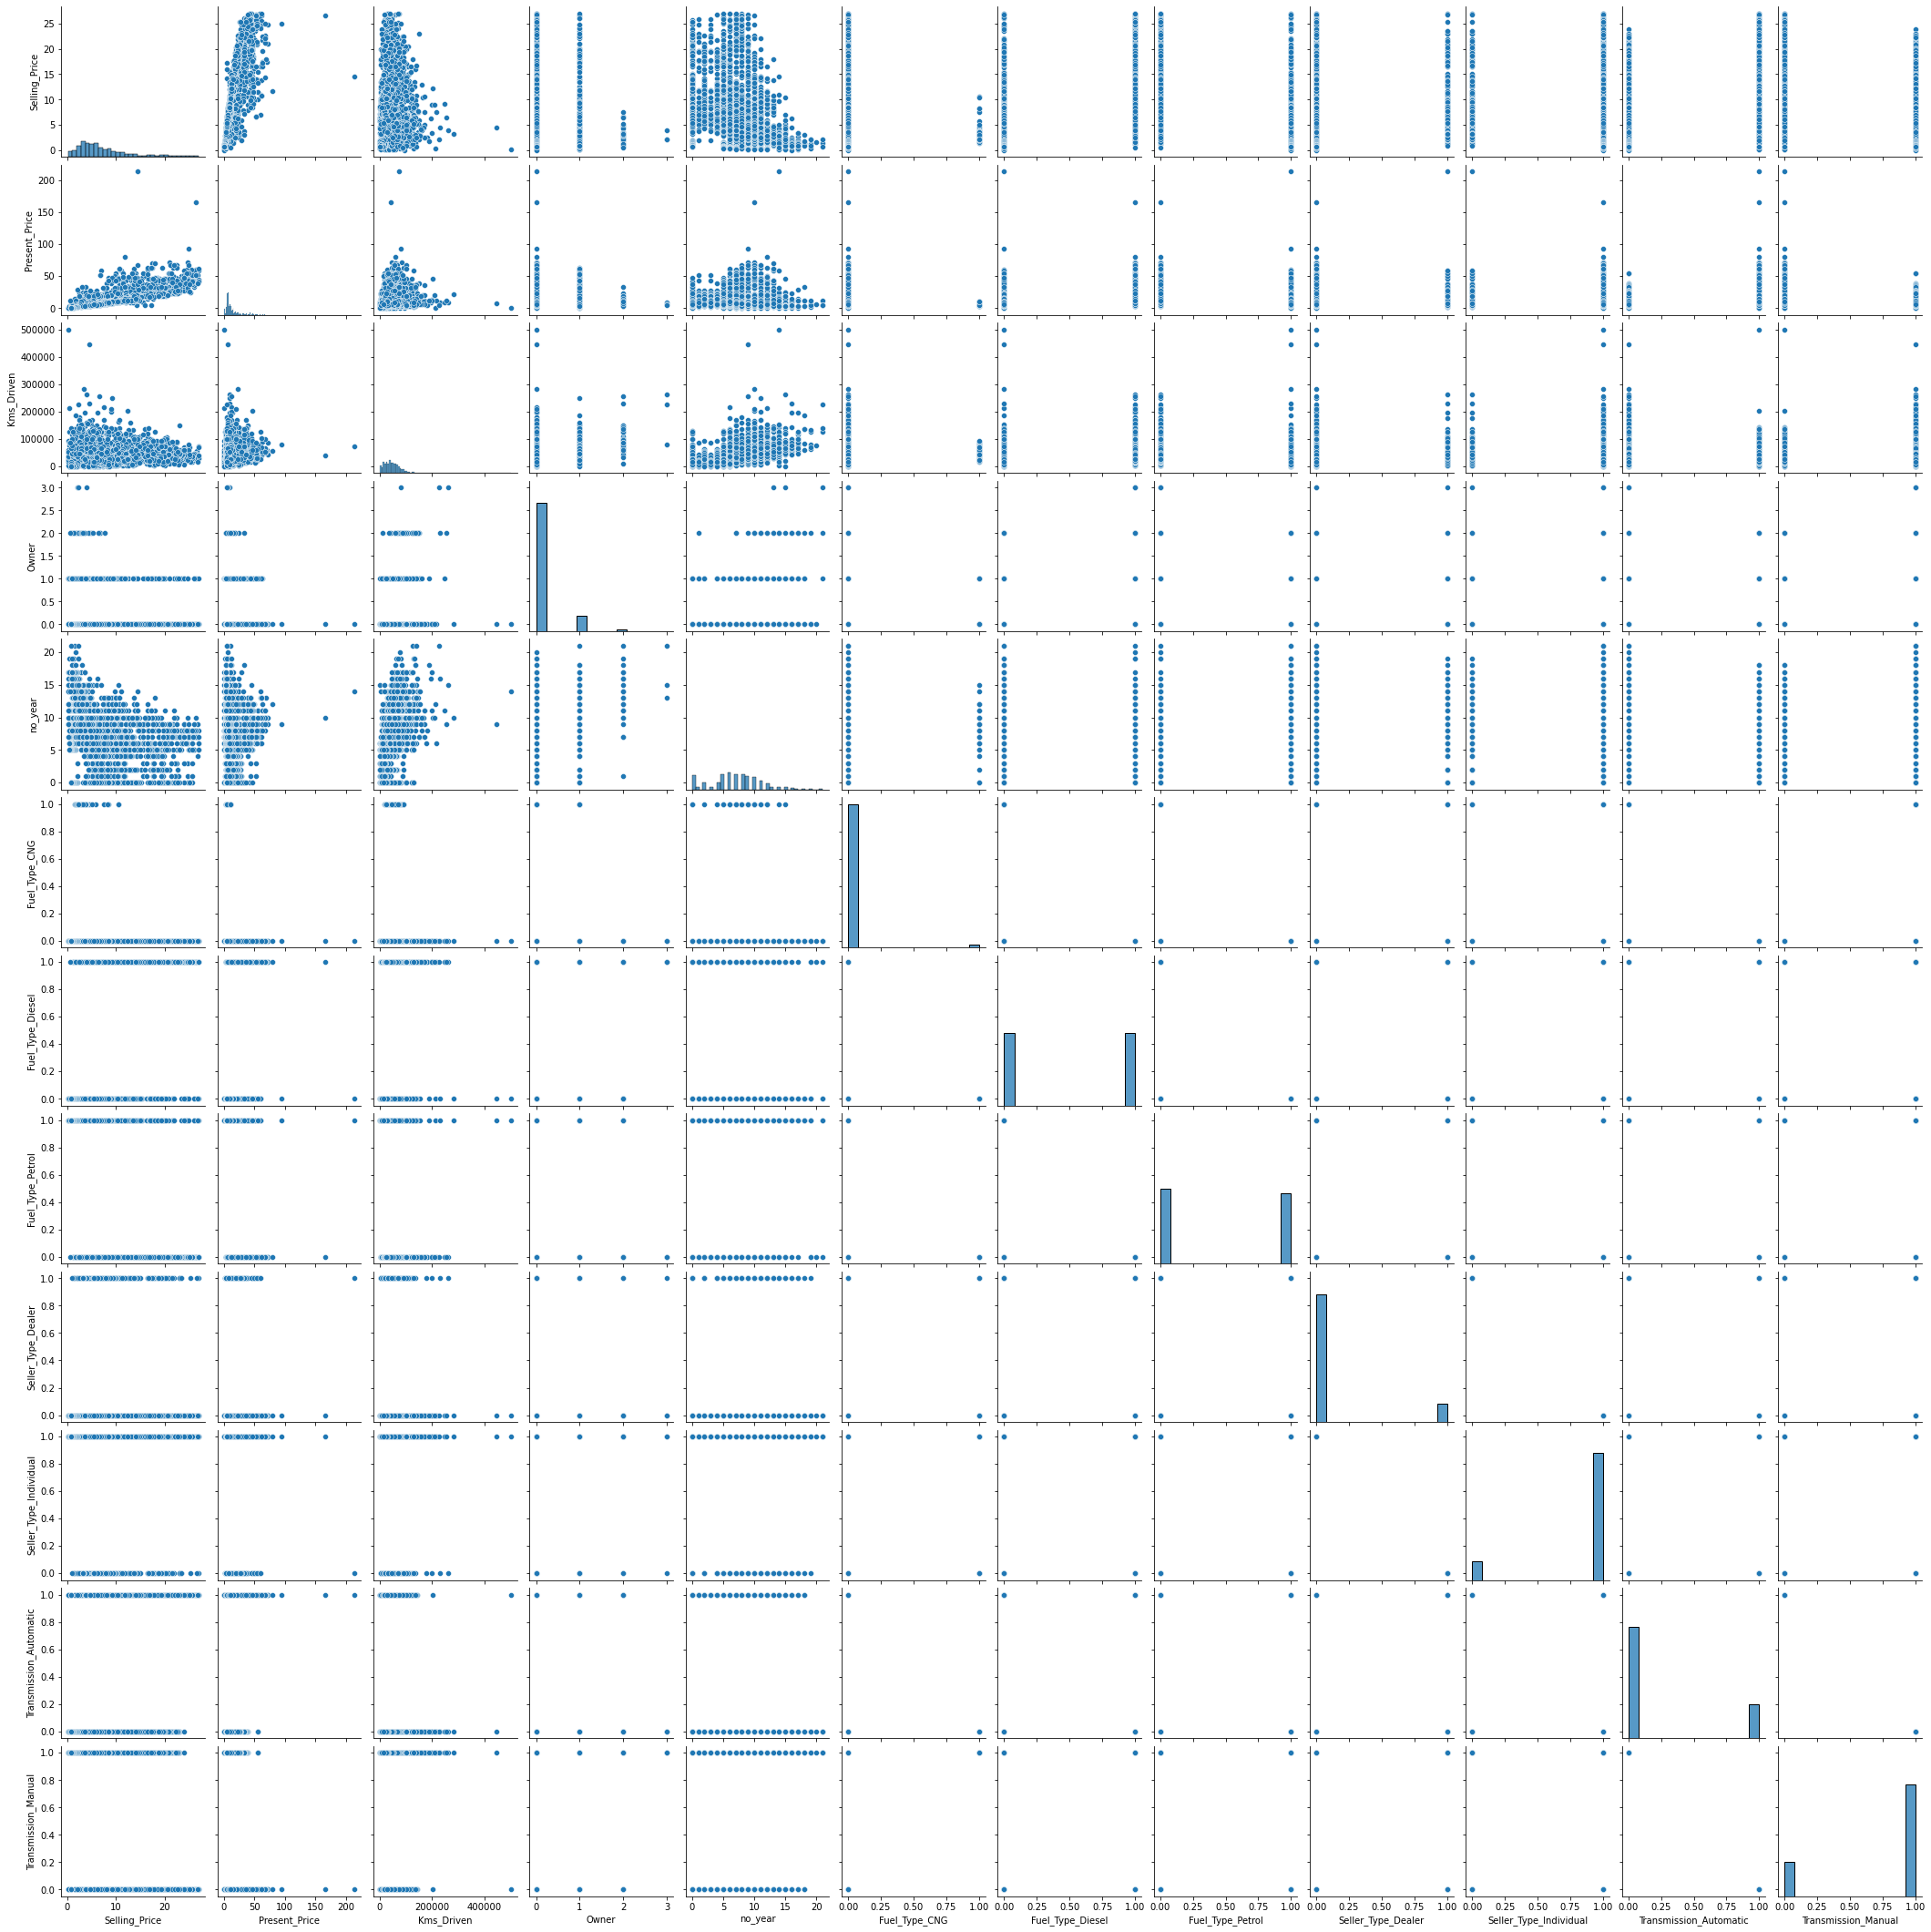

In [78]:
sns.pairplot(final_dataset)

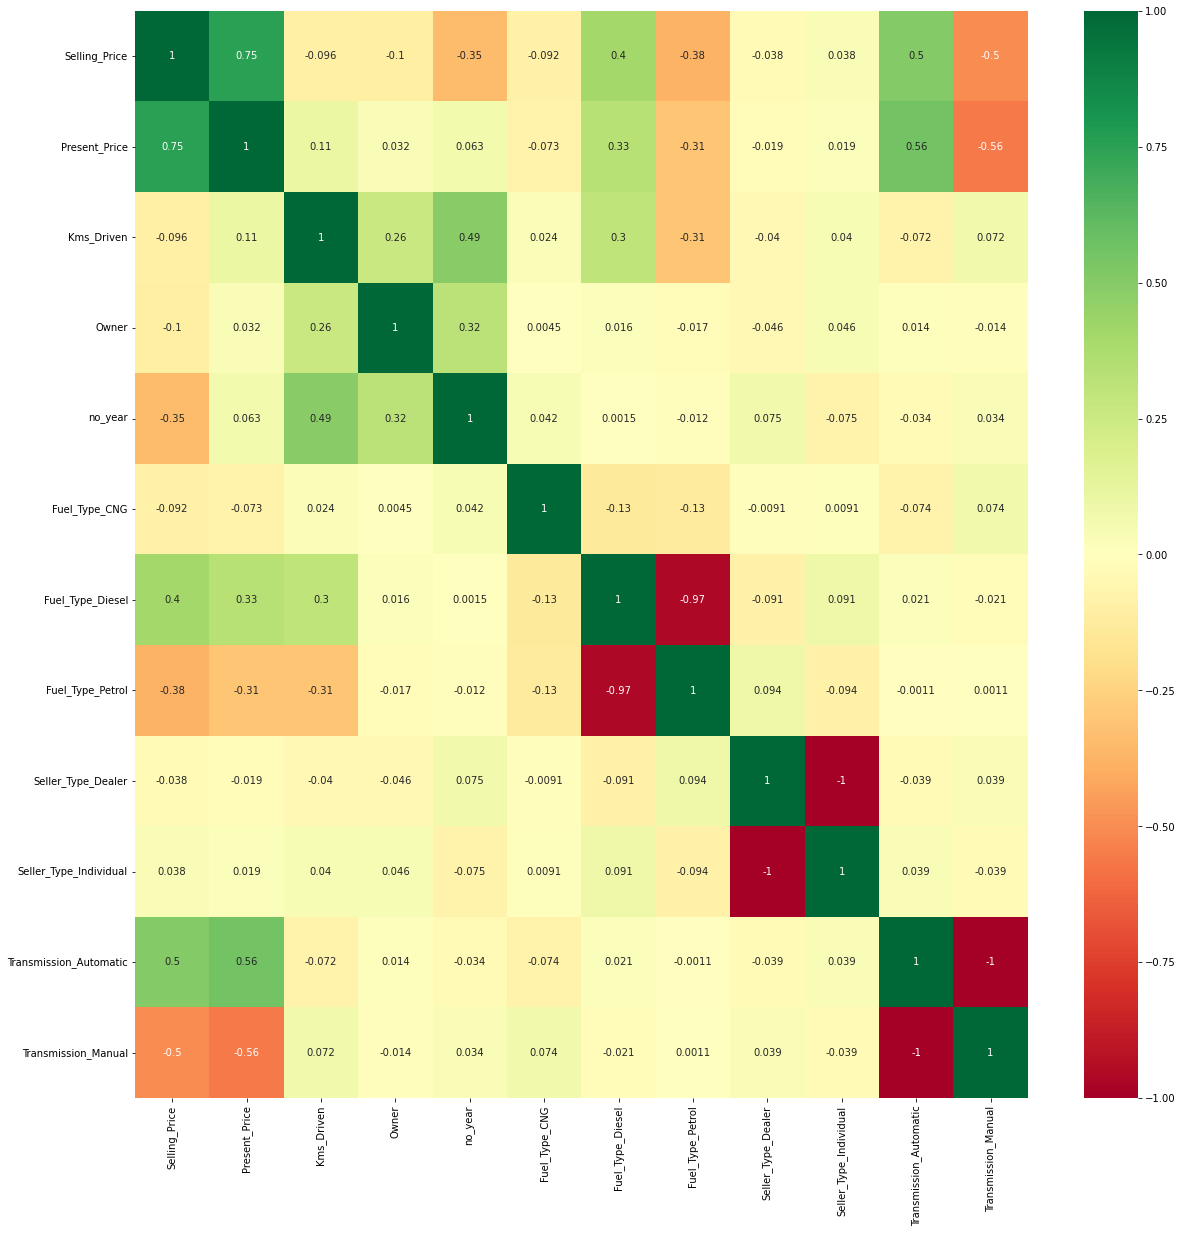

In [79]:

import seaborn as sns
#get correlations of each features in dataset

corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [80]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [81]:
X['Owner'].unique()

array([0, 1, 2, 3])

In [82]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.6,27000,0,8,0,0,1,1,0,0,1
1,9.5,43000,0,9,0,1,0,1,0,0,1
2,9.9,6900,0,5,0,0,1,1,0,0,1
3,4.2,5200,0,11,0,0,1,1,0,0,1
4,6.9,42450,0,8,0,1,0,1,0,0,1


In [83]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [84]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [85]:
print(model.feature_importances_)

[4.19357970e-01 3.67555394e-02 7.59825074e-03 1.61158702e-01
 1.46331742e-04 3.44234010e-02 1.10091084e-01 2.34772217e-03
 2.30847525e-03 2.22349203e-01 3.46332033e-03]


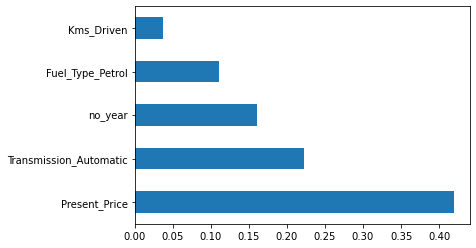

In [86]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
regressor=RandomForestRegressor()

In [90]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [93]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [94]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [95]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [96]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [97]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [98]:
rf_random.best_score_

-2.8387644607690277

In [99]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

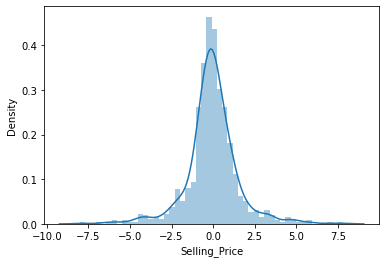

In [100]:
sns.distplot(y_test-predictions)

In [101]:
!pip install -U ibm-watson-machine-learning

In [102]:
location = 'eu-central'

In [103]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://eu-de.ml.cloud.ibm.com",
    "apikey": "Jk3HUp_aUWSKvk9YehA_woUFyvn2BzgOxx_O957KanWp"
    
}
client = APIClient(wml_credentials)
print(client.version)

1.0.257


In [104]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
2ba7d424-ed7c-4313-9b1c-839457a93757  carresaledeployment  2022-11-17T20:00:30.486Z
------------------------------------  -------------------  ------------------------


In [106]:
space_id = "2ba7d424-ed7c-4313-9b1c-839457a93757"

In [107]:
client.set.default_space(space_id)

'SUCCESS'

In [109]:
client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [110]:
MODEL_NAME = 'randomnforestregressor'
DEPLOYMENT_NAME = 'rfr_deploy'
DEMO_MODEL = regressor

In [112]:
software_spec_uid = client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [113]:
# Setup model meta
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [114]:
#Save model
model_details = client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [115]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Selling_Price',
  'schemas': {'input': [{'fields': [{'name': 'Present_Price',
       'type': 'float64'},
      {'name': 'Kms_Driven', 'type': 'int64'},
      {'name': 'Owner', 'type': 'int64'},
      {'name': 'no_year', 'type': 'int64'},
      {'name': 'Fuel_Type_CNG', 'type': 'uint8'},
      {'name': 'Fuel_Type_Diesel', 'type': 'uint8'},
      {'name': 'Fuel_Type_Petrol', 'type': 'uint8'},
      {'name': 'Seller_Type_Dealer', 'type': 'uint8'},
      {'name': 'Seller_Type_Individual', 'type': 'uint8'},
      {'name': 'Transmission_Automatic', 'type': 'uint8'},
      {'name': 'Transmission_Manual', 'type': 'uint8'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-17T20:19:36.555Z',
  'id': '5df9dd7a-bece-498c-b8d8-f57076c9630c',
  'modified_a